In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import calplot
from datetime import datetime
from dateutil import parser

In [23]:
from pyecharts.charts import Bar, Calendar, Pie
from pyecharts.globals import CurrentConfig, NotebookType
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from snapshot_selenium import snapshot
from pyecharts.render import make_snapshot

In [5]:
# Reading Step count data from both mifit and google fit
StepCount = {}

# mifit data
with open("/home/mzfr/dev/year-in-review/fit/mifit/ACTIVITY/ACTIVITY_1605643103723.csv", "r") as f:
    data = csv.DictReader(f)
    for activity in data:
        date = datetime.strptime(activity["\ufeffdate"], "%Y-%m-%d")
        if date.year != 2020:
            continue
        StepCount[date] = int(activity["steps"])

# Google Fit data
with open("/home/mzfr/dev/year-in-review/fit/Fit/Daily Aggregations/Daily Summaries.csv", "r") as f:
    data = csv.DictReader(f)
    for summary in data:
        date = datetime.strptime(summary["Date"], "%Y-%m-%d")
        if date.year != 2020: # Keeping data just for 2020
            continue
        if date not in StepCount:
            try:
                StepCount[date] = int(summary["Step count"])
            except ValueError:
                print(date)

(<Figure size 900x122.4 with 2 Axes>, array([<AxesSubplot:>], dtype=object))

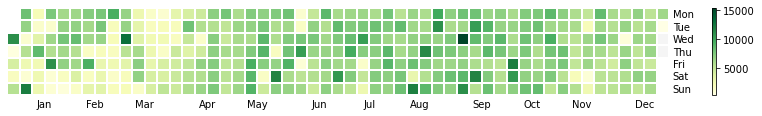

In [14]:
# Step Count

series = pd.Series(StepCount)
calplot.calplot(series, cmap='YlGn', edgecolor=None, yearlabels=False)

In [21]:
SleepTime = []
## Sleep data from MiFit

with open("SLEEP_1674225693405.csv", "r") as f:
    data = csv.DictReader(f)
    for sleep in data:
        date = datetime.strptime(sleep["\ufeffdate"], "%Y-%m-%d")
        if date.year == 2022:
            start = parser.parse(sleep['start'])
            stop = parser.parse(sleep['stop'])

            total = stop-start
            SleepTime.append([date.strftime('%Y-%m-%d'), total.seconds//3600])
        


In [24]:
cal = Calendar()
cal.add("", SleepTime, calendar_opts=opts.CalendarOpts(range_="2022"))
cal.set_global_opts(
        title_opts=opts.TitleOpts(title="Phone Usage", subtitle="Hours per day"),
        visualmap_opts=opts.VisualMapOpts(
            max_=40,
            min_=0,
            orient="horizontal",
            is_piecewise=True,
            pos_top="230px",
            pos_left="100px",
        ),
    )
cal.render()

# make_snapshot(snapshot, cal.render(), 'PC_usage_heatmap.png')

'/home/pwnbox/dev/year-in-review/fit/Fit/render.html'